# Project 5b - Population Dynamics: the Zombie apocalypse

The same ideas associated with modelling hare and lynx can be easily extended to other situations.  Here, we will model a classic zombie apocalypse.  The rules of the situation are simple:
- There are three groups: humans, hungry zombies, and fed zombies.
- The simulation should start with 100 humans, 0 hungry zombies, and 1 fed zombie
- fed zombies scratch humans, turning them into fed zombies.  This occurs in 0.008 zombie-human interactions
- fed zombies turn into hungry zombies at a rate of 0.15 (zombies per zombie) per unit time
- hungry zombies eat human brains, which removes the human from the population, but does not turn them into zombies.  They are less effective than fed zombies, so this only occurs in 0.003 of zombie-human interactions
- If a hungry zombie successfully feeds, they become a fed zombie
- hungry zombies die at a rate of 0.3 (zombies per zombie) per unit time.  

### Model development
**First, write down a system of ODEs that model this situation.  There should be a term on the right hand side corresponding to many of the above rules.  Of particular note: most rules lead to a reduction in one population and a commensurate increase in another population.  Make sure such terms appear (with opposite signs) for both populations.**

In [38]:
h = 100 # humans
f = 1 # fed zombies
z = 0 # hungry zombies
fedz_human_chance = 0.008 # chance for fed to turn human into zombie
fed_hungry = 0.15 # fed to hungry zombie per unit time
hungry_human_chance = 0.003 # chance for hungry to eat human and become a fed zombie
hungry_zombie_death_rate = 0.3 # hungry zombies death chance per unit time

In [39]:
class RK2:
    def __init__(self):
        pass   
    
    def step(self,ode,t,dt,u_0):
        # Do some stuff here
        k1 = ode.rhs(t, u_0)
        k2 = ode.rhs(t + dt, u_0 + dt*k1)
        return u_0 + (dt/2)*(k1 + k2)

In [40]:
class Integrator:
    def __init__(self,ode, method):
        self.ode = ode 
        self.method = method #euler, rk2, rk4
        
    def integrate(self,interval,dt,u_0):
        t_0 = interval[0] 
        t_end = interval[1]
        
        times = [t_0]
        states = [u_0]
        
        t = t_0
        while t<t_end:
            dt_ = min(dt,t_end-t) #picks the smallest of dt and interval length
            u_1 = self.method.step(self.ode,t,dt_,u_0) #gets next position
            t = t + dt_ #increases time interval by dt
            u_0 = u_1 #old position is now new position
            
            times.append(t)
            states.append(u_1)
            
        return np.array(times),np.array(states)

In [100]:
class LoktaVolterra():
    def __init__(self):
        self.alpha = 0.1
        self.beta = 0.01
        self.gamma = 0.002 # y
        self.delta = 0.1 # 8

        self.fedz_human_chance = 0.008 # chance for fed to turn human into fed zombie
        #self.gamma = self.fedz_human_chance
        self.fed_hungry = 0.15 # fed to hungry zombie per unit time
        self.hungry_human_chance = 0.003 # chance for hungry to eat human and become a fed zombie
        self.hungry_zombie_death_rate = 0.1 # hungry zombies death chance per unit time

        #additional
        self.human_clone_rate = 0.05
        self.human_kill_human = 0.03
        self.human_kill_fed = 0.005
        self.human_kill_hungry = 0.04

    def rhs(self, t, u):
        h = u[0]
        f = u[1]
        z = u[2]
        
        
        human_to_fed = self.fedz_human_chance * f * h
        fed_to_hungry = self.fed_hungry * f
        hungry_to_fed = self.hungry_human_chance * h * z
        hungry_to_dead = self.hungry_zombie_death_rate * z

        # additional
        human_clone_human = self.human_clone_rate * h
        human_kill_human = self.human_kill_human * h
        human_kill_fed = self.human_kill_fed * h * f
        human_kill_hungry = self.human_kill_hungry * h * z


        dh_dt = -human_to_fed - hungry_to_fed + human_clone_human - human_kill_human
        df_dt = -fed_to_hungry + hungry_to_fed + human_to_fed - human_kill_fed
        dz_dt = -hungry_to_dead - hungry_to_fed + fed_to_hungry - human_kill_hungry

        return np.array([dh_dt, df_dt, dz_dt])
    



In [101]:
import numpy as np

method = RK2()
ode = LoktaVolterra()
integrator = Integrator(ode, method)

h = 100. # humans
f = 1. # fed zombies
z = 0. # hungry zombies

t_0 = 0.0
t_end = 1000.
dt = 0.1
t,u = integrator.integrate([t_0,t_end],dt,np.array([h,f,z]))

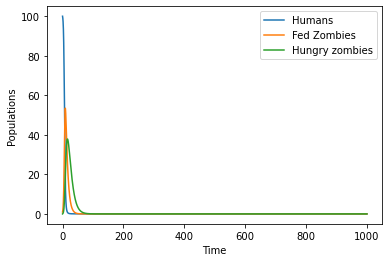

In [102]:
import matplotlib.pyplot as plt

plt.plot(t,u[:,0], label='Humans')
plt.plot(t,u[:,1], label='Fed Zombies')
plt.plot(t,u[:,2], label='Hungry zombies')
plt.xlabel('Time')
plt.ylabel('Populations')
plt.legend()
plt.show()

### Model implementation
**Implement the above model.  If it is implemented correctly, all interesting dynamics should proceed within 50 time units (are they days, hours?  I'll leave that to you to conceptualize).  Again, a second order Runge-Kutta method works fine here.**
